In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [385]:
import os
DATA_PATH = "Dane/USA/SP_500.csv"

In [386]:
data_stock = pd.read_csv(DATA_PATH, sep=",")

In [387]:
data_stock.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


In [388]:
data_stock.describe()

,Open,High,Low,Close,Volume
count,1592.000000,1592.000000,1592.000000,1592.000000,1.592000e+03
mean,1983.254391,1991.843769,1974.077142,1983.754906,1.973925e+09
std,385.776016,386.468906,384.702618,385.463489,3.629619e+08
min,1277.820000,1282.550000,1266.740000,1278.040000,6.938667e+08
25%,1687.297500,1692.052500,1681.657500,1688.845000,1.762729e+09
50%,2018.305000,2026.790000,2005.280000,2019.180000,1.935067e+09
75%,2177.872500,2183.827500,2171.437500,2180.080000,2.129876e+09
max,2867.230000,2872.870000,2851.480000,2872.870000,4.220806e+09


In [389]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1592 non-null   object 
 1   Open    1592 non-null   float64
 2   High    1592 non-null   float64
 3   Low     1592 non-null   float64
 4   Close   1592 non-null   float64
 5   Volume  1592 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 74.8+ KB


# Wykresy

Zróbmy wykres CLOSE w zależności od czasu

In [390]:
import matplotlib.pyplot as plt

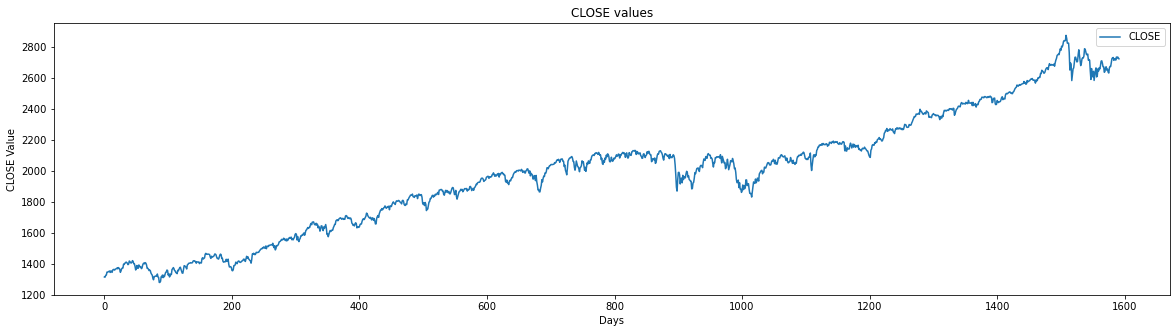

In [391]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'], label = 'CLOSE')
# plt.ylim([-0.004, 0.004])
# plt.xlim([0, 1660])
plt.ylabel('CLOSE Value')
plt.xlabel('Days')
plt.title('CLOSE values')
plt.legend()
plt.show()

Spójrzmy na wycinek dzienny (7 dni)

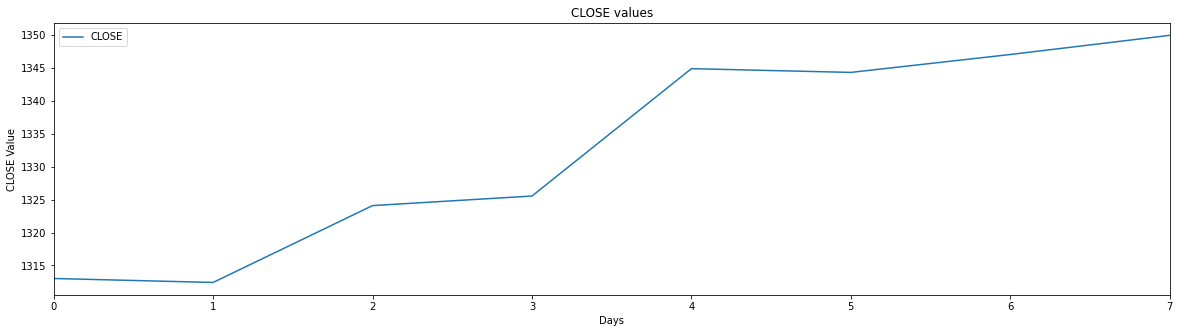

In [392]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'][:8], label = 'CLOSE')
plt.xlim([0, 7])
plt.ylabel('CLOSE Value')
plt.xlabel('Days')
plt.title('CLOSE values')
plt.legend()
plt.show()

# Podzielenie danych na X i y

Będziemy próbowali przewidzieć wartość CLOSE

Spróbujemy to zrobić wykorzystując **n poprzednich danych**

W tym celu utwórzmy kopię naszego dataframe *wig* aby móc dodać do niego dodatkowe kolumny wykorzystujące informacje z przeszłości

In [393]:
data_stock_modified = data_stock

In [394]:
data_stock_modified.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


Dodamy kolumny:<br>
* Open_1_ago
* High_1_ago
* Low_1_ago
* Close_1_ago
* Vol_1_ago

**Oraz analogiczne kolumny dla 2 dnia wcześniej, 3 dnia wcześniej itd.**

Usuńmy więc n pierwszych wierszy z naszych danych, gdyż dla nich nie będziemy mieli danych z przeszłości

In [395]:
memory = 30

In [396]:
data_stock_modified = data_stock_modified[memory:]

In [397]:
for i in range (1, memory+1):
    data_stock_modified['Open_'+str(i)+'_ago'] = np.array(data_stock['Open'][memory-i:-i])
    data_stock_modified['High_'+str(i)+'_ago'] = np.array(data_stock['High'][memory-i:-i])
    data_stock_modified['Low_'+str(i)+'_ago'] = np.array(data_stock['Low'][memory-i:-i])
    data_stock_modified['Close_'+str(i)+'_ago'] = np.array(data_stock['Close'][memory-i:-i])
    data_stock_modified['Vol_'+str(i)+'_ago'] = np.array(data_stock['Volume'][memory-i:-i])

<ipython-input-397-dada57d4c7bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_modified['Open_'+str(i)+'_ago'] = np.array(data_stock['Open'][memory-i:-i])
<ipython-input-397-dada57d4c7bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_modified['High_'+str(i)+'_ago'] = np.array(data_stock['High'][memory-i:-i])
<ipython-input-397-dada57d4c7bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [398]:
data_stock_modified.head(6)

,Date,Open,High,Low,Close,Volume,Open_1_ago,High_1_ago,Low_1_ago,Close_1_ago,...,Open_29_ago,High_29_ago,Low_29_ago,Close_29_ago,Vol_29_ago,Open_30_ago,High_30_ago,Low_30_ago,Close_30_ago,Vol_30_ago
30,2012-03-13,1371.92,1396.13,1371.92,1395.95,2436927778,1370.78,1373.04,1366.69,1371.09,...,1313.53,1321.41,1306.69,1312.41,2353083333,1316.16,1316.16,1300.49,1313.01,2032783333
31,2012-03-14,1395.95,1399.42,1389.97,1394.28,2501266667,1371.92,1396.13,1371.92,1395.95,...,1312.45,1330.52,1312.45,1324.09,2502422222,1313.53,1321.41,1306.69,1312.41,2353083333
32,2012-03-15,1394.17,1402.63,1392.78,1402.60,2373138889,1395.95,1399.42,1389.97,1394.28,...,1324.24,1329.19,1321.57,1325.54,2289400000,1312.45,1330.52,1312.45,1324.09,2502422222
33,2012-03-16,1402.55,1405.88,1401.47,1404.17,2868861111,1394.17,1402.63,1392.78,1402.60,...,1326.21,1345.34,1326.21,1344.90,2560305556,1324.24,1329.19,1321.57,1325.54,2289400000
34,2012-03-19,1404.17,1414.00,1402.43,1409.75,2184761111,1402.55,1405.88,1401.47,1404.17,...,1344.32,1344.36,1337.52,1344.33,1877611111,1326.21,1345.34,1326.21,1344.90,2560305556
35,2012-03-20,1409.59,1409.59,1397.68,1405.52,2052933333,1404.17,1414.00,1402.43,1409.75,...,1344.33,1349.24,1335.92,1347.05,2079144444,1344.32,1344.36,1337.52,1344.33,1877611111


**Możemy teraz utworzyć nasze zbiory X oraz y**

Wydzielamy zbiór wartości

In [399]:
y = data_stock_modified['Close'].values

In [400]:
y

array([1395.95, 1394.28, 1402.6 , ..., 2733.29, 2727.76, 2721.33])

**Wydzielamy zbiór argumentów**

Usuwamy High, Low, Close, Vol, gdyż są to dane z przyszłości

Ponadto usuwamy również Date, gdyż nie wnosi ona aktualnie wartościowych informacji i może zniekształcić nasz model

In [401]:
X = data_stock_modified.drop(['High', 'Low', 'Close', 'Volume', 'Date'], axis=1)

In [402]:
X.head(8)

,Open,Open_1_ago,High_1_ago,Low_1_ago,Close_1_ago,Vol_1_ago,Open_2_ago,High_2_ago,Low_2_ago,Close_2_ago,...,Open_29_ago,High_29_ago,Low_29_ago,Close_29_ago,Vol_29_ago,Open_30_ago,High_30_ago,Low_30_ago,Close_30_ago,Vol_30_ago
30,1371.92,1370.78,1373.04,1366.69,1371.09,1712150000,1365.97,1374.76,1365.97,1370.87,...,1313.53,1321.41,1306.69,1312.41,2353083333,1316.16,1316.16,1300.49,1313.01,2032783333
31,1395.95,1371.92,1396.13,1371.92,1395.95,2436927778,1370.78,1373.04,1366.69,1371.09,...,1312.45,1330.52,1312.45,1324.09,2502422222,1313.53,1321.41,1306.69,1312.41,2353083333
32,1394.17,1395.95,1399.42,1389.97,1394.28,2501266667,1371.92,1396.13,1371.92,1395.95,...,1324.24,1329.19,1321.57,1325.54,2289400000,1312.45,1330.52,1312.45,1324.09,2502422222
33,1402.55,1394.17,1402.63,1392.78,1402.60,2373138889,1395.95,1399.42,1389.97,1394.28,...,1326.21,1345.34,1326.21,1344.90,2560305556,1324.24,1329.19,1321.57,1325.54,2289400000
34,1404.17,1402.55,1405.88,1401.47,1404.17,2868861111,1394.17,1402.63,1392.78,1402.60,...,1344.32,1344.36,1337.52,1344.33,1877611111,1326.21,1345.34,1326.21,1344.90,2560305556
35,1409.59,1404.17,1414.00,1402.43,1409.75,2184761111,1402.55,1405.88,1401.47,1404.17,...,1344.33,1349.24,1335.92,1347.05,2079144444,1344.32,1344.36,1337.52,1344.33,1877611111
36,1405.52,1409.59,1409.59,1397.68,1405.52,2052933333,1404.17,1414.00,1402.43,1409.75,...,1347.04,1351.00,1341.95,1349.96,2275961111,1344.33,1349.24,1335.92,1347.05,2079144444
37,1402.89,1405.52,1407.75,1400.64,1402.89,1985327778,1409.59,1409.59,1397.68,1405.52,...,1349.97,1354.32,1344.63,1351.95,2338827778,1347.04,1351.00,1341.95,1349.96,2275961111


# Modele

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None, shuffle=False)

In [404]:
open_values = X_test['Open'].values

In [405]:
X_train

,Open,Open_1_ago,High_1_ago,Low_1_ago,Close_1_ago,Vol_1_ago,Open_2_ago,High_2_ago,Low_2_ago,Close_2_ago,...,Open_29_ago,High_29_ago,Low_29_ago,Close_29_ago,Vol_29_ago,Open_30_ago,High_30_ago,Low_30_ago,Close_30_ago,Vol_30_ago
1246,2268.60,2269.72,2279.27,2265.27,2268.90,2021550000,2273.59,2275.49,2268.90,2268.90,...,2200.76,2210.46,2198.15,2204.66,2059200000,2210.21,2211.14,2200.36,2201.72,1947583333
1270,2335.58,2326.12,2337.58,2322.17,2337.58,1956061111,2321.72,2331.58,2321.42,2328.25,...,2261.60,2272.82,2261.60,2270.75,2091605556,2251.57,2263.88,2245.13,2257.83,2094738889
804,2102.03,2091.51,2102.61,2091.51,2102.06,1753444444,2081.29,2093.31,2074.29,2091.18,...,2105.23,2117.52,2104.50,2117.39,1894161111,2110.88,2112.74,2103.75,2104.50,1970766667
1291,2383.71,2387.71,2388.10,2377.18,2381.38,1869811111,2370.34,2390.01,2368.94,2385.26,...,2288.54,2298.31,2287.88,2297.42,1998872222,2276.69,2283.97,2271.65,2280.85,2115394444
889,2081.10,2102.66,2102.66,2076.49,2084.07,2060488889,2080.98,2105.35,2080.98,2104.18,...,2067.00,2082.78,2067.00,2077.42,2070700000,2061.19,2074.28,2056.32,2063.11,2265855556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,2182.76,2185.17,2187.87,2179.07,2186.16,1844122222,2181.61,2186.57,2175.10,2186.48,...,2166.05,2172.85,2159.74,2170.06,2035688889,2169.81,2174.98,2159.07,2166.58,2219722222
1324,2389.79,2386.50,2389.82,2379.75,2388.13,2163327778,2391.05,2392.93,2385.82,2391.17,...,2345.97,2358.92,2342.13,2345.96,1811444444,2343.00,2351.81,2336.45,2348.45,1984850000
890,2086.19,2081.10,2089.06,2052.09,2086.05,2371738889,2102.66,2102.66,2076.49,2084.07,...,2078.03,2085.06,2071.02,2076.78,1664744444,2067.00,2082.78,2067.00,2077.42,2070700000
1489,2686.10,2682.10,2685.64,2678.91,2682.62,1223377778,2679.09,2682.74,2677.96,2680.50,...,2569.45,2572.84,2557.45,2564.62,1977161111,2577.75,2579.66,2566.56,2578.87,2023200000


**Skalowanie**

In [406]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [407]:
X_train.shape

(1249, 151)

In [408]:
y_train.shape

(1249,)

In [409]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# seed=123
# kfold = StratifiedKFold(n_splits=5)

In [410]:
X_train

array([[ 0.70411755,  0.70901804,  0.71039383, ...,  0.61997528,
         0.59750208, -0.0926876 ],
       [ 0.87970305,  0.8568532 ,  0.86297653, ...,  0.73831677,
         0.74556704,  0.30827113],
       [ 0.26746069,  0.24189566,  0.24811876, ...,  0.36460401,
         0.34095467, -0.02951934],
       ...,
       [ 0.22593674,  0.21460907,  0.21266179, ...,  0.26746195,
         0.26949505,  0.24277171],
       [ 1.79857776,  1.78994463,  1.77376257, ...,  1.58795952,
         1.59273823,  0.11334718],
       [ 0.44912798,  0.45696435,  0.43437903, ...,  0.51263   ,
         0.50105271, -0.19372956]])

In [411]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(300,activation="elu",input_shape=(X_train.shape[1],)))
model.add(Dense(150,activation="elu"))
model.add(Dense(50,activation="elu"))

# model.add(Dense(100,activation="elu",input_shape=(X_train.shape[1],)))
# model.add(Dense(50,activation="elu"))
# model.add(Dense(10,activation="elu"))


model.add(Dense(1,activation="elu"))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 300)               45600     
_________________________________________________________________
dense_50 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_51 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 51        
Total params: 98,351
Trainable params: 98,351
Non-trainable params: 0
_________________________________________________________________


In [412]:
model.compile(loss="mean_squared_error",optimizer='adam')

In [413]:
model.fit(X_train, y_train, batch_size=32,epochs=500, callbacks=[history_sgd])

Epoch 1/500
40/40 [==============================] - 0s 1ms/step - loss: 3697891.0000
Epoch 2/500
40/40 [==============================] - 0s 1ms/step - loss: 2004676.1250
Epoch 3/500
40/40 [==============================] - 0s 1ms/step - loss: 1685831.7500
Epoch 4/500
40/40 [==============================] - 0s 1ms/step - loss: 1406150.5000
Epoch 5/500
40/40 [==============================] - 0s 1ms/step - loss: 1258092.3750
Epoch 6/500
40/40 [==============================] - 0s 1ms/step - loss: 1192282.8750
Epoch 7/500
40/40 [==============================] - 0s 1ms/step - loss: 1161668.6250
Epoch 8/500
40/40 [==============================] - 0s 1ms/step - loss: 1148580.0000
Epoch 9/500
40/40 [==============================] - 0s 1ms/step - loss: 1141843.5000
Epoch 10/500
40/40 [==============================] - 0s 1ms/step - loss: 1138308.8750
Epoch 11/500
40/40 [==============================] - 0s 1ms/step - loss: 1135776.1250
Epoch 12/500
40/40 [==============================] 

40/40 [==============================] - 0s 1ms/step - loss: 1116012.3750
Epoch 96/500
40/40 [==============================] - 0s 1ms/step - loss: 1115985.5000
Epoch 97/500
40/40 [==============================] - 0s 1ms/step - loss: 1115961.7500
Epoch 98/500
40/40 [==============================] - 0s 1ms/step - loss: 1115995.2500
Epoch 99/500
40/40 [==============================] - 0s 1ms/step - loss: 1116042.5000
Epoch 100/500
40/40 [==============================] - 0s 1ms/step - loss: 1115958.6250
Epoch 101/500
40/40 [==============================] - 0s 1ms/step - loss: 1115981.8750
Epoch 102/500
40/40 [==============================] - 0s 1ms/step - loss: 1115922.0000
Epoch 103/500
40/40 [==============================] - 0s 1ms/step - loss: 1115949.3750
Epoch 104/500
40/40 [==============================] - 0s 1ms/step - loss: 1115980.0000
Epoch 105/500
40/40 [==============================] - 0s 1ms/step - loss: 1115904.6250
Epoch 106/500
40/40 [=============================

40/40 [==============================] - 0s 1ms/step - loss: 1115734.8750
Epoch 189/500
40/40 [==============================] - 0s 1ms/step - loss: 1115742.8750
Epoch 190/500
40/40 [==============================] - 0s 1ms/step - loss: 1115743.7500
Epoch 191/500
40/40 [==============================] - 0s 1ms/step - loss: 1115805.7500
Epoch 192/500
40/40 [==============================] - 0s 1ms/step - loss: 1115795.7500
Epoch 193/500
40/40 [==============================] - 0s 2ms/step - loss: 1115752.8750
Epoch 194/500
40/40 [==============================] - 0s 1ms/step - loss: 1115778.6250
Epoch 195/500
40/40 [==============================] - 0s 1ms/step - loss: 1115744.3750
Epoch 196/500
40/40 [==============================] - 0s 1ms/step - loss: 1115823.5000
Epoch 197/500
40/40 [==============================] - 0s 1ms/step - loss: 1115727.8750
Epoch 198/500
40/40 [==============================] - 0s 1ms/step - loss: 1115736.5000
Epoch 199/500
40/40 [=========================

40/40 [==============================] - 0s 1ms/step - loss: 1115762.7500
Epoch 282/500
40/40 [==============================] - 0s 1ms/step - loss: 1115716.3750
Epoch 283/500
40/40 [==============================] - 0s 1ms/step - loss: 1115764.7500
Epoch 284/500
40/40 [==============================] - 0s 1ms/step - loss: 1115670.3750
Epoch 285/500
40/40 [==============================] - 0s 1ms/step - loss: 1115759.7500
Epoch 286/500
40/40 [==============================] - 0s 1ms/step - loss: 1115748.6250
Epoch 287/500
40/40 [==============================] - 0s 1ms/step - loss: 1115806.3750
Epoch 288/500
40/40 [==============================] - 0s 1ms/step - loss: 1115723.3750
Epoch 289/500
40/40 [==============================] - 0s 1ms/step - loss: 1115690.3750
Epoch 290/500
40/40 [==============================] - 0s 1ms/step - loss: 1115685.8750
Epoch 291/500
40/40 [==============================] - 0s 1ms/step - loss: 1115817.3750
Epoch 292/500
40/40 [=========================

40/40 [==============================] - 0s 1ms/step - loss: 1115638.8750
Epoch 375/500
40/40 [==============================] - 0s 1ms/step - loss: 1115641.7500
Epoch 376/500
40/40 [==============================] - 0s 1ms/step - loss: 1115624.5000
Epoch 377/500
40/40 [==============================] - 0s 1ms/step - loss: 1115626.1250
Epoch 378/500
40/40 [==============================] - 0s 1ms/step - loss: 1115638.1250
Epoch 379/500
40/40 [==============================] - 0s 1ms/step - loss: 1115645.6250
Epoch 380/500
40/40 [==============================] - 0s 1ms/step - loss: 1115635.1250
Epoch 381/500
40/40 [==============================] - 0s 1ms/step - loss: 1115629.0000
Epoch 382/500
40/40 [==============================] - 0s 1ms/step - loss: 1115651.3750
Epoch 383/500
40/40 [==============================] - 0s 1ms/step - loss: 1115617.6250
Epoch 384/500
40/40 [==============================] - 0s 1ms/step - loss: 1115630.3750
Epoch 385/500
40/40 [=========================

40/40 [==============================] - 0s 1ms/step - loss: 1115638.0000
Epoch 468/500
40/40 [==============================] - 0s 1ms/step - loss: 1115619.1250
Epoch 469/500
40/40 [==============================] - 0s 1ms/step - loss: 1115614.1250
Epoch 470/500
40/40 [==============================] - 0s 1ms/step - loss: 1115689.1250
Epoch 471/500
40/40 [==============================] - 0s 1ms/step - loss: 1115650.2500
Epoch 472/500
40/40 [==============================] - 0s 1ms/step - loss: 1115694.0000
Epoch 473/500
40/40 [==============================] - 0s 1ms/step - loss: 1115628.3750
Epoch 474/500
40/40 [==============================] - 0s 1ms/step - loss: 1115610.3750
Epoch 475/500
40/40 [==============================] - 0s 1ms/step - loss: 1115623.1250
Epoch 476/500
40/40 [==============================] - 0s 1ms/step - loss: 1115652.7500
Epoch 477/500
40/40 [==============================] - 0s 1ms/step - loss: 1115605.7500
Epoch 478/500
40/40 [=========================

In [414]:
history_sgd.history.keys()

dict_keys(['loss'])

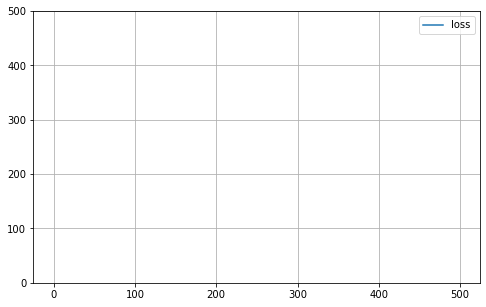

In [415]:
pd.DataFrame(history_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 500)
plt.show()

In [416]:
predictions = model.predict(X_test)

In [417]:
predictions

array([[ 2.6309553e+03],
       [ 2.0515898e+03],
       [-1.0000000e+00],
       [ 2.0532822e+03],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [ 2.0832224e+03],
       [ 2.6577336e+03],
       [ 2.1793533e+03],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [ 2.0490608e+03],
       [ 2.7321443e+03],
       [-1.0000000e+00],
       [ 2.2406165e+03],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [ 1.9251378e+03],
       [ 2.1318206e+03],
       [-1.0000000e+00],
       [ 2.0900605e+03],
       [-1.0000000e+00],
       [ 2.3404387e+03],
       [ 2.6722571e+03],
       [ 2.1411094e+03],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [-1.0000000e+00],
       [ 2.1495876e+03],
       [ 2.5479192e+03],
       [ 1.8549698e+03],
       [ 2.5841101e+03],
       [ 2.1054775e+03],
       [-1.0000000e+00],


# Analiza wyników

In [418]:
predictions = np.concatenate(predictions)

In [419]:
d = {'Open': open_values,
    'Close': y_test, 
     'Close_Predicted': predictions
    }
results = pd.DataFrame(data=d)

In [420]:
results.head()

,Open,Close,Close_Predicted
0,2617.18,2613.16,2630.955322
1,2065.92,2082.42,2051.589844
2,1696.10,1691.42,-1.000000
3,2032.36,2031.92,2053.282227
4,1945.83,1946.17,-1.000000


In [421]:
results['Difference'] = results['Close_Predicted'] - results['Close']

In [422]:
results.head()

,Open,Close,Close_Predicted,Difference
0,2617.18,2613.16,2630.955322,17.795322
1,2065.92,2082.42,2051.589844,-30.830156
2,1696.10,1691.42,-1.000000,-1692.420000
3,2032.36,2031.92,2053.282227,21.362227
4,1945.83,1946.17,-1.000000,-1947.170000


In [423]:
results.describe()

,Open,Close,Close_Predicted,Difference
count,313.000000,313.000000,313.000000,313.000000
mean,1977.020288,1977.073450,1221.186646,-755.886736
std,369.787059,367.517635,1129.354248,841.387589
min,1277.820000,1278.040000,-1.000000,-2003.280000
25%,1705.740000,1697.480000,-1.000000,-1649.360000
50%,2003.660000,2000.540000,1996.239014,-28.853994
75%,2166.470000,2163.790000,2163.595459,0.587070
max,2832.410000,2823.810000,2824.437256,67.724980


In [424]:
from sklearn import  metrics
metrics.r2_score(results['Close'], results['Close_Predicted'])

-8.484982612132228

In [425]:
print("Difference mean: ", results['Difference'].mean())
print("Difference std: ", results['Difference'].std())

Difference mean:  -755.886735526868
Difference std:  841.3875890573304


**Dowiedzmy się ile wynosi accuracy naszego modelu w kwestii przewidywania czy kurs wzrósł czy zmalał**

Utwórzmy kolumny Up_Down oraz Up_Down_Predicted

1 będzie oznaczała, że kurs wzrósł<br>
0 kurs zmalał lub pozostał taki sam

In [426]:
results['Up_Down'] = results['Close'] - results['Open']
results['Up_Down'] = results['Up_Down'].map(lambda diff: 1 if diff > 0 else 0)

In [427]:
results['Up_Down_Predicted'] = results['Close_Predicted'] - results['Open']
results['Up_Down_Predicted'] = results['Up_Down_Predicted'].map(lambda diff: 1 if diff > 0 else 0)

In [428]:
results.head()

,Open,Close,Close_Predicted,Difference,Up_Down,Up_Down_Predicted
0,2617.18,2613.16,2630.955322,17.795322,0,1
1,2065.92,2082.42,2051.589844,-30.830156,1,0
2,1696.10,1691.42,-1.000000,-1692.420000,0,0
3,2032.36,2031.92,2053.282227,21.362227,0,1
4,1945.83,1946.17,-1.000000,-1947.170000,1,0


**Utwórzmy jeszcze kolumnę wskazującą na to czy model przewidział wzrost/spadek poprawnie**

1 = model przewidział wzrost/spadek poprawnie<br>
0 = model źle przewidział wzrost/spadek

In [429]:
results['Prediction_correct'] = results['Up_Down'] - results['Up_Down_Predicted']
results['Prediction_correct'] = results['Prediction_correct'].map(lambda res: 1 if res==0 else 0)

In [430]:
results.head()

,Open,Close,Close_Predicted,Difference,Up_Down,Up_Down_Predicted,Prediction_correct
0,2617.18,2613.16,2630.955322,17.795322,0,1,0
1,2065.92,2082.42,2051.589844,-30.830156,1,0,0
2,1696.10,1691.42,-1.000000,-1692.420000,0,0,1
3,2032.36,2031.92,2053.282227,21.362227,0,1,0
4,1945.83,1946.17,-1.000000,-1947.170000,1,0,0


**Usuńmy kolumny Up_Down oraz Up_Down_Predicted aby nie zaciemniać wyników**

In [431]:
results.drop(['Up_Down', 'Up_Down_Predicted'], axis=1, inplace=True)

In [432]:
results.head()

,Open,Close,Close_Predicted,Difference,Prediction_correct
0,2617.18,2613.16,2630.955322,17.795322,0
1,2065.92,2082.42,2051.589844,-30.830156,0
2,1696.10,1691.42,-1.000000,-1692.420000,1
3,2032.36,2031.92,2053.282227,21.362227,0
4,1945.83,1946.17,-1.000000,-1947.170000,0


**Policzmy liczbę jedynek i podzielmy ją przez liczbę wszystkich wierszy, wynik da nam accuracy**

In [433]:
good = results['Prediction_correct'].sum()
print(good)

154


In [434]:
accuracy = good/(results.shape[0])

In [435]:
print("accuracy: ", accuracy)

accuracy:  0.49201277955271566
